## Week 8 - task 3 TO DO

In [6]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Suppose the number of lions observed at a camera trap in a given day follows a Poisson distribution with rate 1.
tfd = tfp.distributions
lions = tfd.Poisson(rate=1)

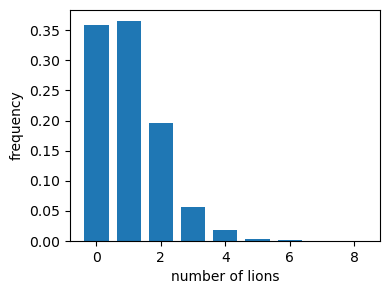

In [8]:
#We can now sample from this distribution to explore how the number of lions varies across different days.
# sample from the distribution for 10 years worth of samples
n_lions = lions.sample(3650)

# plot the histogram of number of lions each day
plt.figure(figsize=(4,3))
plt.hist(n_lions.numpy(), bins = np.arange(10),rwidth=0.75,density=True,align='left')
plt.xlabel('number of lions')
plt.ylabel('frequency')
plt.show()

The number of
wildebeest detected also follows a Poisson distribution except the influence of the lions is nowdetermined
by an uknown parameter 𝛼
𝜆𝑤 = exp (4 − 𝛼𝑁𝑙)
where 𝑁𝑙 is the number of lions that day.

In [14]:
#Over 20 days, the following observations are made:

ldata = np.array([0, 2, 1, 1, 2, 3, 6, 4, 5, 6, 7, 2, 0, 6, 5, 6, 2, 1, 6, 5])
wdata = np.array([64, 0, 16, 14, 3, 1, 0, 0, 0, 0, 0, 1, 58, 0, 0, 0, 6, 10, 0, 0])

#Using the same joint distribution as we used in the example above, find the maximum likelihood estimate
#for 𝛼 given these data using the L-BFGS optimizer

In [15]:
@tf.function
def loss_lions(alpha):
    joint = tfd.JointDistributionSequential([
        tfd.Poisson(rate=np.float64(1),name='lions'),
    lambda lions : tfd.Poisson(rate=tf.math.exp(4-alpha*lions),name='wildebeest')
    ])
    return (-tf.reduce_sum(joint.log_prob([ldata,wdata])))

In [16]:
def loss_and_gradient(x):
    return tfp.math.value_and_gradient(lambda x: loss_lions(x), x)

In [17]:
# specify the starting value
start = np.array([1.0]).astype(np.float64)

# run the optimizer and check convergence
results = tfp.optimizer.lbfgs_minimize(loss_and_gradient, initial_position=start, tolerance=1e-8)

print('Optimizer converged: ',results.converged.numpy())

Optimizer converged:  True


In [18]:
#We can now print the optimal value (the true value of 𝛼 used to create the data was 1.5)
print(results.position.numpy())

[1.48189109]
